In [24]:
import pandas as pd # Library for importing the data
from sklearn.decomposition import PCA # Library for implementing PCA
from sklearn.preprocessing import StandardScaler # Libary for scaling the data
import matplotlib.pyplot as plt # Library for visualising the data
import seaborn as sns # Library for visualising the data
import numpy as np # Libary for working with nd-data
import category_encoders as ce # For encoding categorical variables

In [2]:
df = pd.read_csv("no_null_dataframe.csv") # Importing the data

In [3]:
df.head() # Displaying few entries

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful,Hour
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True,12
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False,12
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,unknown,unknown,Chrome 69.0.3497.17.19,desktop,True,12
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,unknown,unknown,Chrome Mobile 81.0.4044.1931,mobile,False,12
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,unknown,unknown,MiuiBrowser 12.6.5,mobile,False,12


In [5]:
df.drop(["Hour"], inplace=True, axis=1) # Removing the redundant columns

In [6]:
# Applying title case to Region column
df["Region"] = df['Region'].str.title()
df['City'] = df['City'].str.title()

In [7]:
# Separating the Browser Name and Version into separate columns
df[['Browser Name', 'Version']] = df['Browser Name and Version'].str.extract(r'([a-zA-Z]+[a-zA-Z\s]*[a-zA-Z]+) (\d.*\d)')

# Removing the Browser Name and Version Column
df.drop(["Browser Name and Version"], inplace=True, axis=1)

In [8]:
df.isnull().sum() # Checking the null values in each column

Login Timestamp         0
User ID                 0
IP Address              0
Country                 0
Region                  0
City                    0
Device Type             0
Login Successful        0
Browser Name        21800
Version             21800
dtype: int64

In [9]:
df.dropna(subset=["Browser Name", "Version"], inplace=True)

In [10]:
# Converting the 'Login Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Extracting year, month, day, hour, minute and second information into separate columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second

# Removing the Login Timestamp and Timestamp Columns
df.drop(['Login Timestamp', 'Timestamp'], inplace=True, axis=1)

In [11]:
df.isnull().sum() # Checking the null values in each column

User ID             0
IP Address          0
Country             0
Region              0
City                0
Device Type         0
Login Successful    0
Browser Name        0
Version             0
Year                0
Month               0
Day                 0
Hour                0
Minute              0
Second              0
dtype: int64

In [12]:
df.head() # Displaying few entries

,User ID,IP Address,Country,Region,City,Device Type,Login Successful,Browser Name,Version,Year,Month,Day,Hour,Minute,Second
0,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,mobile,True,Android,2.3.3.2672,2020,2,3,12,43,55
1,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,mobile,False,Chrome Mobile WebView,85.0.4183,2020,2,3,12,43,59
2,7246533443898239661,80.202.228.214,NO,Unknown,Unknown,desktop,True,Chrome,69.0.3497.17.19,2020,2,3,12,44,7
3,-3243978724802435038,170.39.78.177,US,Unknown,Unknown,mobile,False,Chrome Mobile,81.0.4044.1931,2020,2,3,12,44,12
4,8076000552587369902,10.0.61.212,NO,Unknown,Unknown,mobile,False,MiuiBrowser,12.6.5,2020,2,3,12,44,17


In [23]:
test_df = df.sample(10000) # Randomly selecting 10000 entries

In [25]:
# Specify the columns to encode
columns_to_encode = ['IP Address', 'Country', 'Region', 'City', 'Device Type', 'Browser Name', 'Version']

# Initialize an empty dataframe for the encoded columns
encoded_df = pd.DataFrame()

# Iterate over the columns to encode
for column in columns_to_encode:
    # Apply count encoding to the column
    freq_encoder = ce.CountEncoder(cols=[column])
    encoded_column = freq_encoder.fit_transform(test_df[column])
    
    # Concatenate the encoded column to the dataframe
    encoded_df = pd.concat([encoded_df, encoded_column], axis=1)

# Drop the original columns from the dataframe
test_df.drop(columns=columns_to_encode, inplace=True)

# Concatenate the original dataframe with the encoded columns
test_df_encoded = pd.concat([test_df, encoded_df], axis=1)

# Convert the 'Login Successful' column to integer type
test_df_encoded['Login Successful'] = test_df_encoded['Login Successful'].astype(int)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_df_encoded)
df_scaled = scaled_data

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)

In [26]:
# Calculate the variance of the original data
original_variance = np.var(df_scaled, axis=0).sum()

# Calculate the variance of the selected features
selected_features_variance = np.var(pca.transform(df_scaled), axis=0).sum()

# Calculate the variance lost
variance_lost = original_variance - selected_features_variance

# Calculate the percentage of variance lost
percentage_variance_lost = (variance_lost / original_variance) * 100

# Print the variance lost
print(f"Variance Lost: {variance_lost:.4f}")
print(f"Percentage Variance Lost: {percentage_variance_lost:.2f}%")

Variance Lost: 11.0031
Percentage Variance Lost: 73.35%


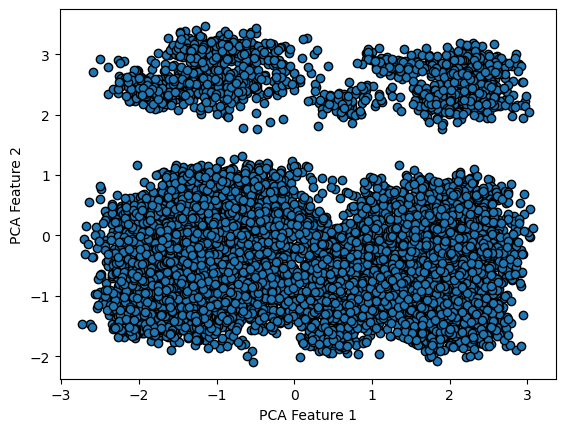

In [27]:
# Plotting a scatterplot of the PCA features
plt.scatter(pca_features[:, 0], pca_features[:, 1], edgecolor='black')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [28]:
# LOF plot to identify local anomalies in a dataset
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_pred = lof.fit_predict(pca_features)

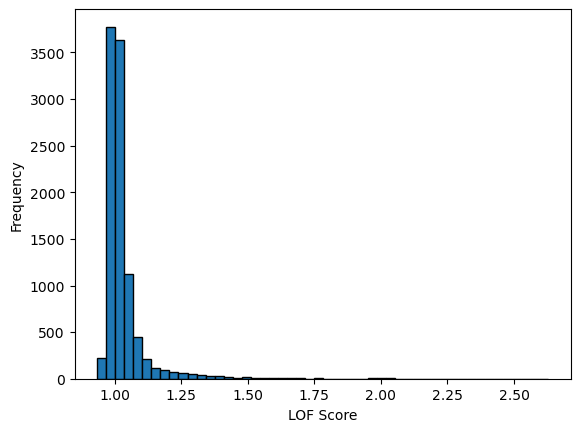

In [29]:
# Get the LOF scores for the data points
lof_scores = lof.negative_outlier_factor_

# Convert the LOF scores to positive values
lof_scores = -1 * lof_scores

# Ploting the LOF scores using a histogram
plt.hist(lof_scores, bins=50, edgecolor="black")
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.show()

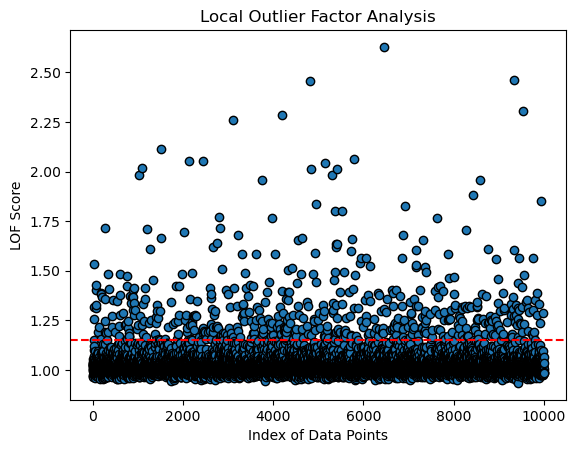

In [39]:
# Define the threshold for identifying anomalies
lof_threshold = 1.15

# plot LOF scores against the index of the data points
plt.scatter(range(len(lof_scores)), lof_scores, edgecolor="black")

# add a horizontal line at the threshold for identifying anomalies
plt.axhline(y=lof_threshold, color='r', linestyle='--')

# add axis labels and a title
plt.xlabel('Index of Data Points')
plt.ylabel('LOF Score')
plt.title('Local Outlier Factor Analysis')
plt.show()

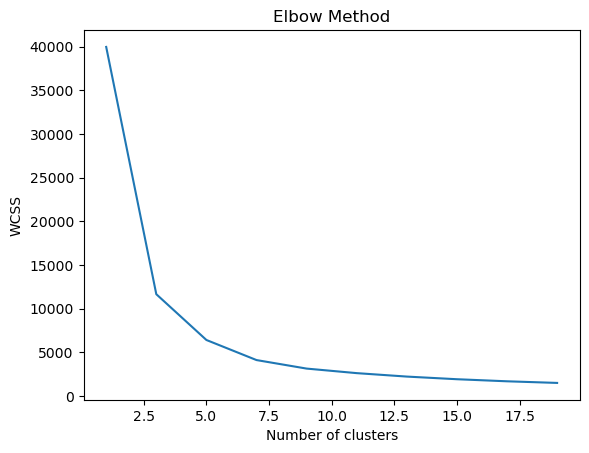

In [31]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 21, 2):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=5000, n_init=10, random_state=0)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21, 2), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


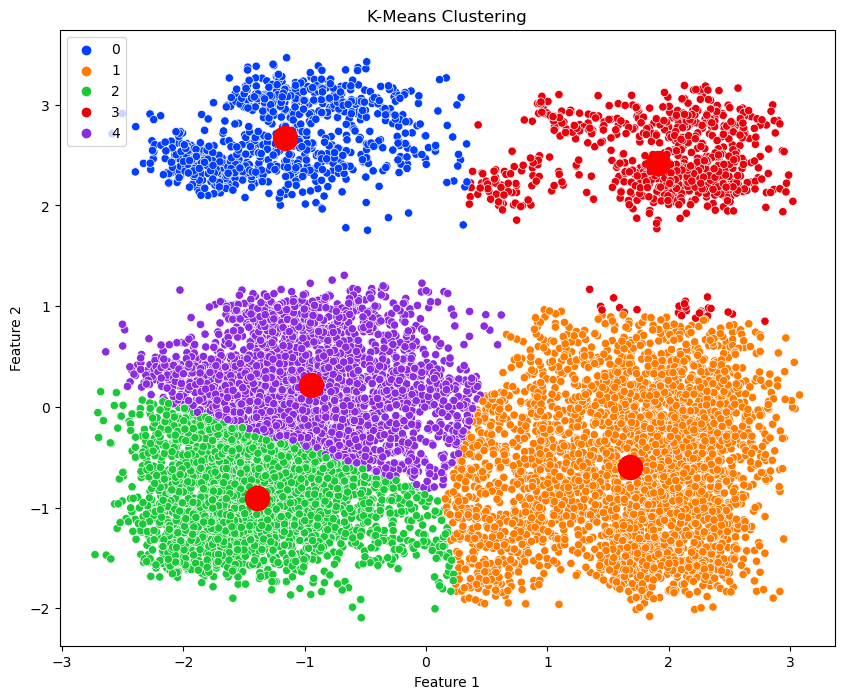

In [32]:
# Fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=5)
pred_y = kmeans.fit_predict(pca_features)

# Visualize the clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=pred_y, palette='bright')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

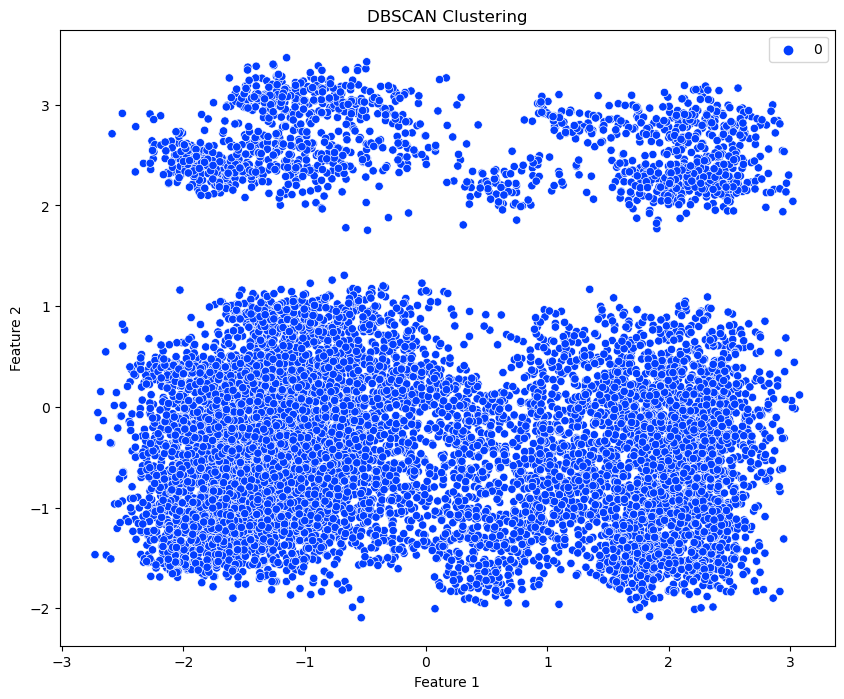

In [33]:
from sklearn.cluster import DBSCAN

# DBSCAN model
dbscan = DBSCAN()
clusters = dbscan.fit_predict(pca_features)

# Visualization of clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='bright', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

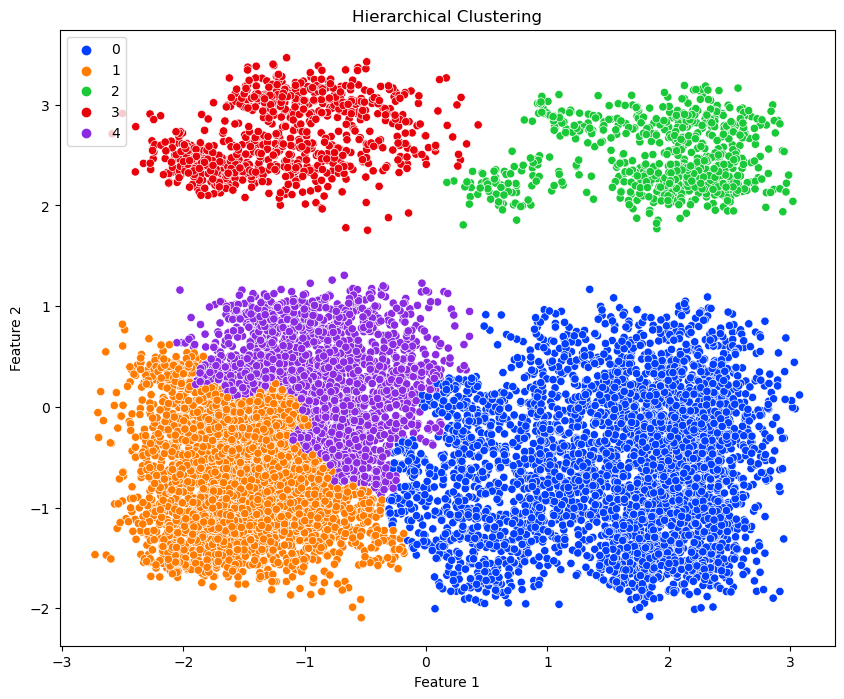

In [40]:
from sklearn.cluster import AgglomerativeClustering

# Fit the agglomerative clustering model
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
model.fit(pca_features)

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=model.labels_, palette='bright')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

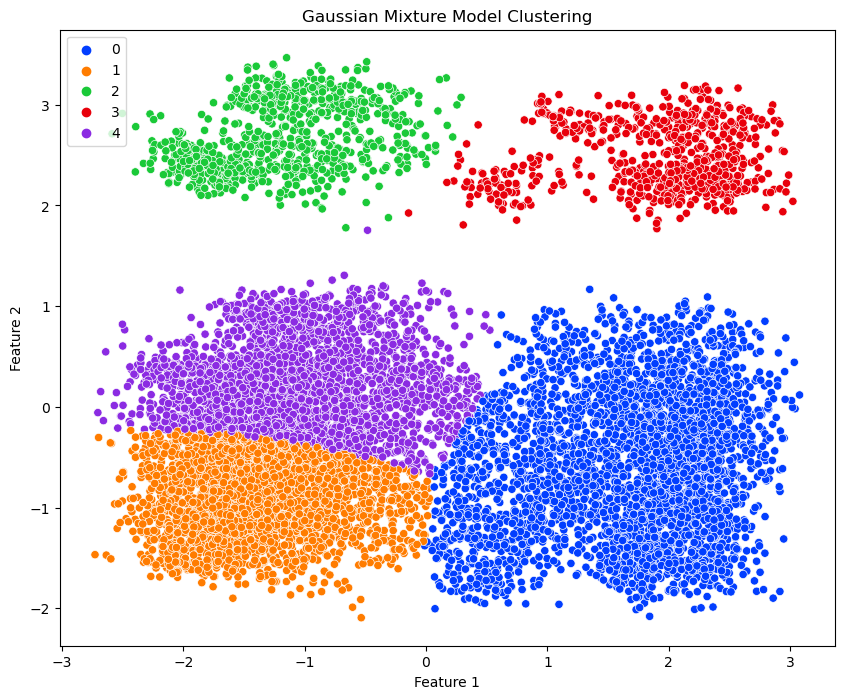

In [41]:
from sklearn.mixture import GaussianMixture

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
gmm.fit(pca_features)

# Predict the cluster labels
pred_y = gmm.predict(pca_features)

# Visualize the clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=pred_y, palette='bright')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

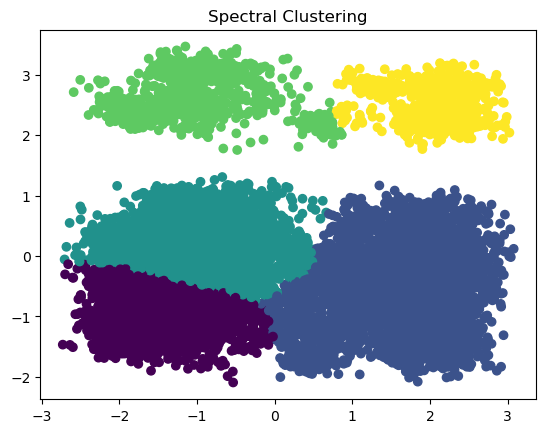

In [42]:
from sklearn.cluster import SpectralClustering

# Create spectral clustering object with 2 clusters
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans')

# Fit and predict using the clustering object
cluster_labels = spectral_clustering.fit_predict(pca_features)

# Plot the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()

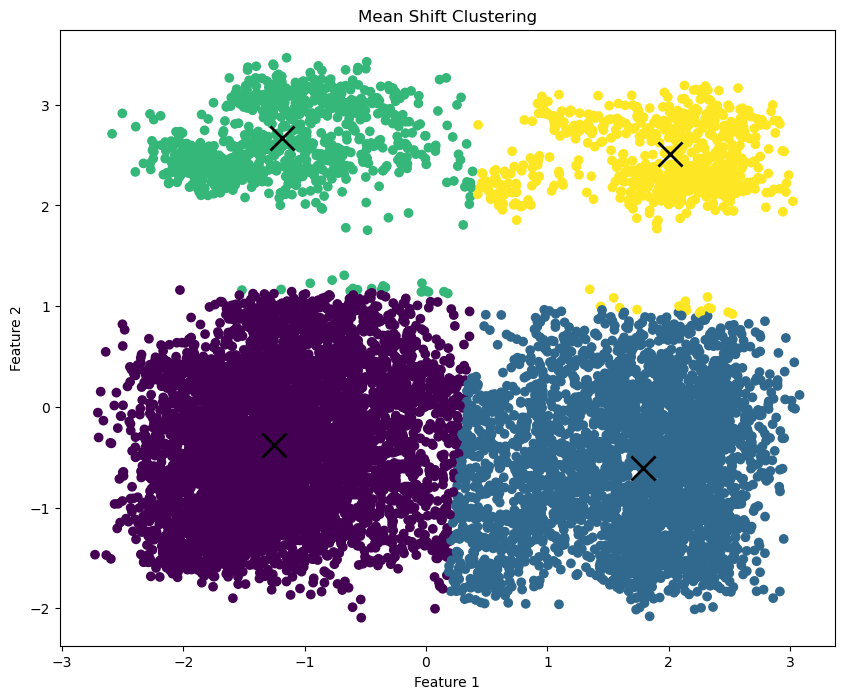

In [37]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate the bandwidth using a heuristic
bandwidth = estimate_bandwidth(pca_features, quantile=0.2, n_samples=500)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
ms.fit(pca_features)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Plot the clusters and cluster centers
plt.figure(figsize=(10,8))
plt.scatter(pca_features[:,0], pca_features[:,1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', s=300, linewidths=2, color='black')
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Epoch [1/10], Loss: 2.2390
Epoch [2/10], Loss: 2.2189
Epoch [3/10], Loss: 2.1956
Epoch [4/10], Loss: 2.1666
Epoch [5/10], Loss: 2.1239
Epoch [6/10], Loss: 2.0575
Epoch [7/10], Loss: 1.9533
Epoch [8/10], Loss: 1.8186
Epoch [9/10], Loss: 1.6870
Epoch [10/10], Loss: 1.5599


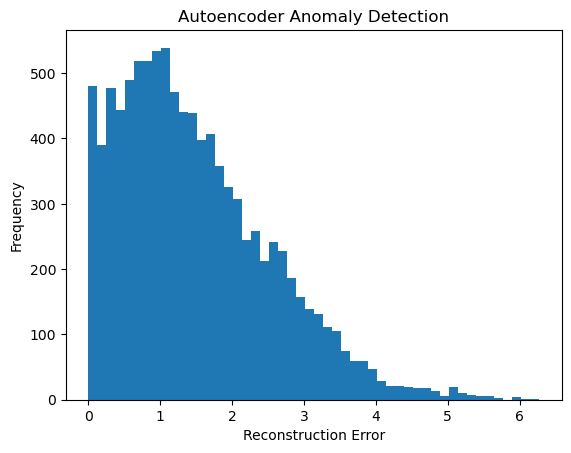

In [38]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

X_train = pca_features

# Define the input shape
input_shape = X_train.shape[1]

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_shape):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define the autoencoder model
autoencoder = Autoencoder(input_shape)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder model
num_epochs = 10
batch_size = 1000
num_batches = X_train.shape[0] // batch_size
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(num_batches):
        # Get a batch of data
        batch_x = torch.Tensor(X_train[i*batch_size:(i+1)*batch_size])
        # Forward pass
        outputs = autoencoder(batch_x)
        loss = criterion(outputs, batch_x)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss/num_batches))

X_train_tensor = torch.Tensor(X_train)
X_pred_tensor = autoencoder(X_train_tensor)
mse = np.mean(np.power(X_train - X_pred_tensor.detach().numpy(), 2), axis=1)

# Plot the reconstruction error as a histogram
plt.hist(mse, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Autoencoder Anomaly Detection')
plt.show()

In [ ]:
df.to_csv('cleaned_dataframe.csv', index=False) # Saving the dataframe